<a href="https://colab.research.google.com/github/masa8/fan/blob/master/Fan_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sensor Settings

Location: On the Pole on the fan.

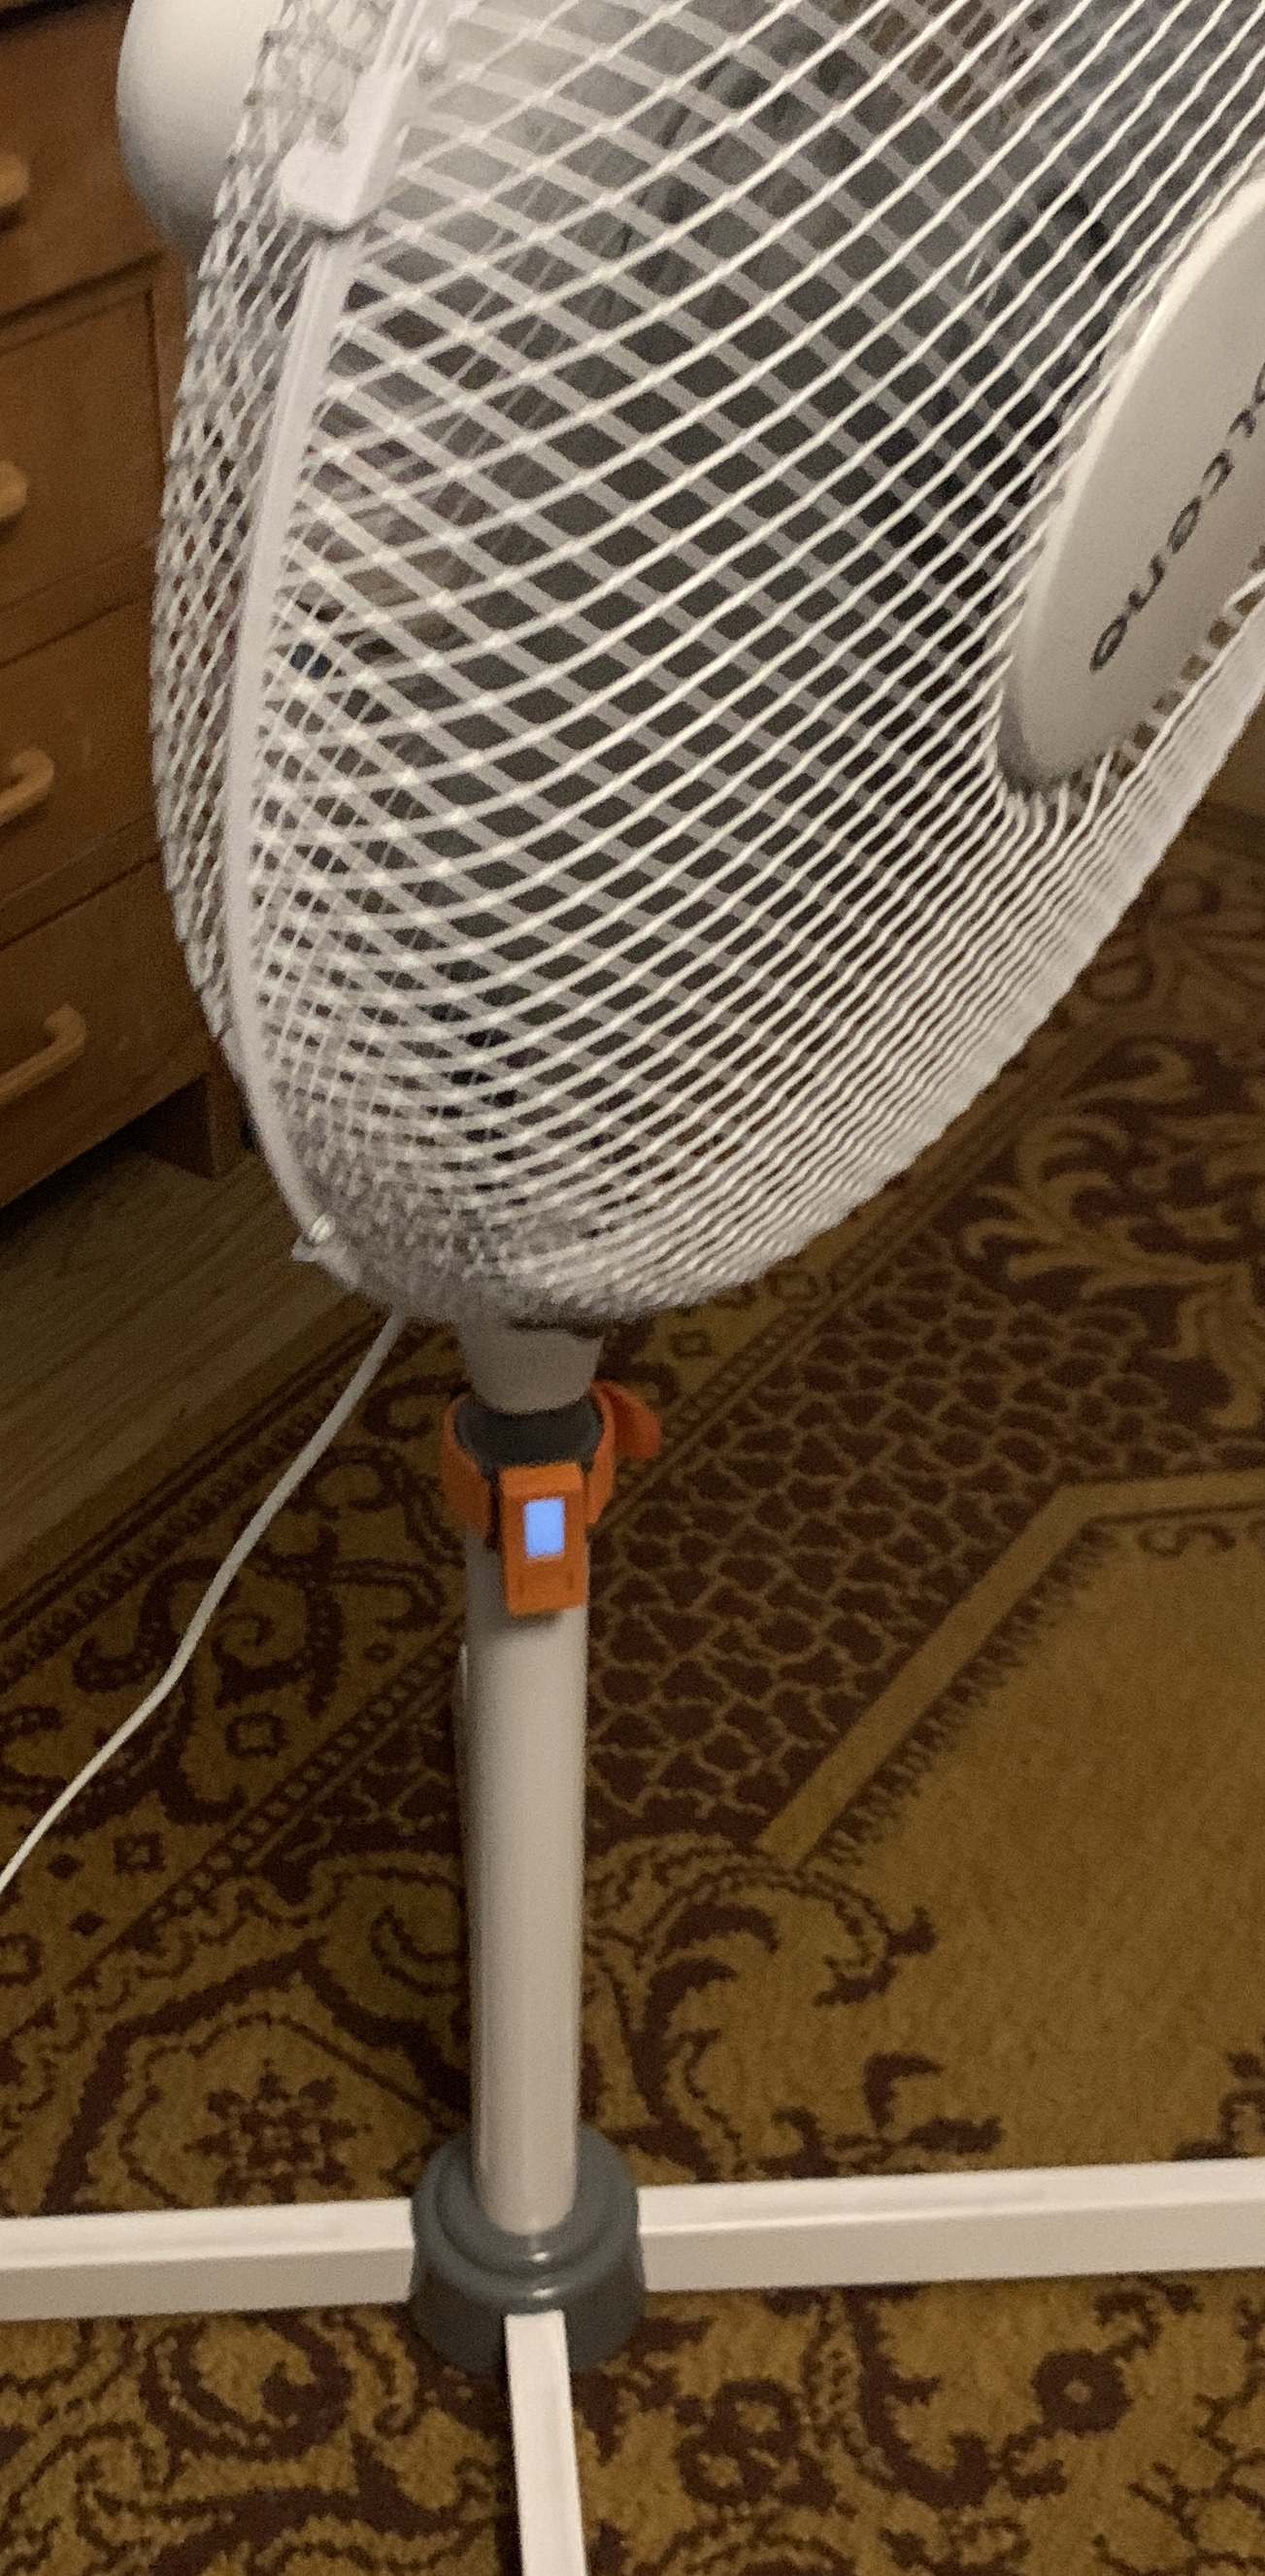

In [145]:
from IPython.display import Image
Image('https://raw.githubusercontent.com/masa8/fan/master/fan_and_sensor.JPG', width = 300, height = 600)

axis: 

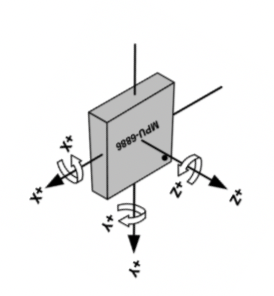

In [148]:
from IPython.display import Image
Image('https://raw.githubusercontent.com/masa8/fan/master/sensor_xyz_axis.png')

accelaration sensor data unit: g.    
sampling rate.               : 100Hz 


### Data




spin: https://raw.githubusercontent.com/masa8/fan/master/spin.csv

stop: https://raw.githubusercontent.com/masa8/fan/master/stop.csv

swing: https://raw.githubusercontent.com/masa8/fan/master/swing.csv

test: https://raw.githubusercontent.com/masa8/fan/master/test.csv


### Check the data

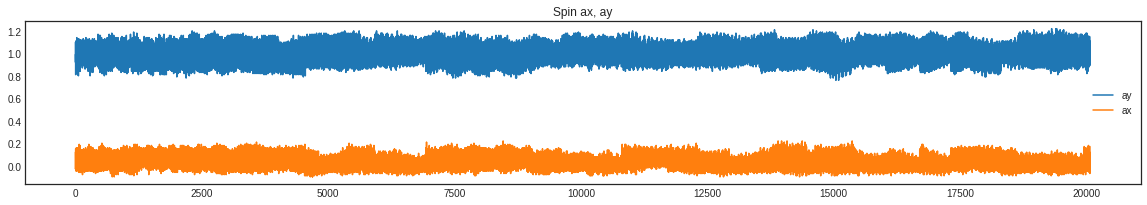

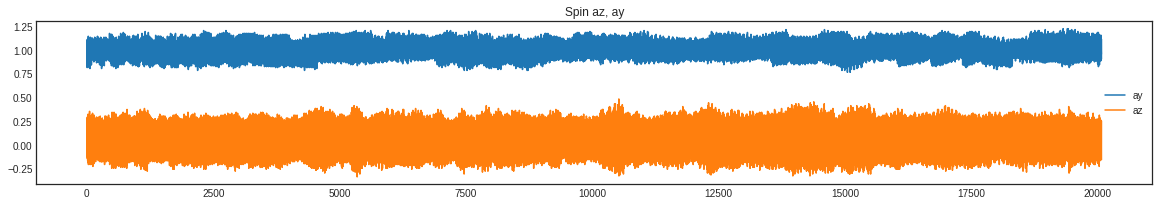

In [136]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = [20, 3]

import pandas as pd


url_spin = "https://raw.githubusercontent.com/masa8/fan/master/spin.csv"
df_spin = pd.read_csv(url_spin,header=None, names=['ax', 'ay', 'az'])
df_spin.plot(y=["ay","ax"], title="Spin ax, ay")
df_spin.plot(y=["ay","az"], title="Spin az, ay")


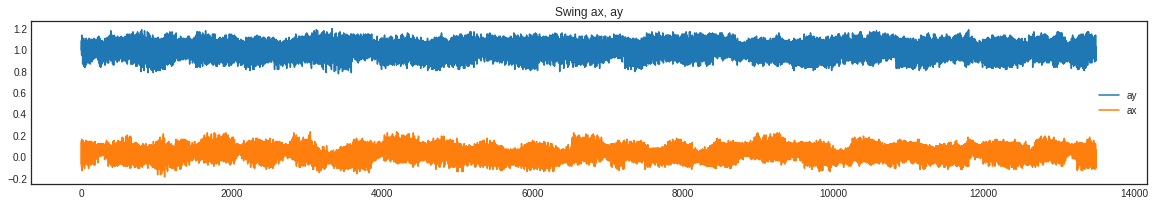

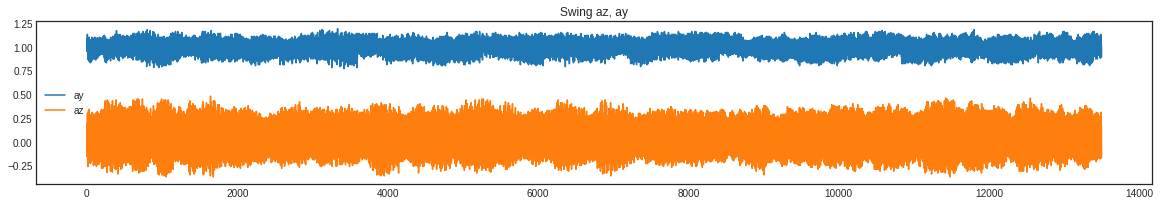

In [137]:
url_swing = "https://raw.githubusercontent.com/masa8/fan/master/swing.csv"
df_swing = pd.read_csv(url_swing,header=None, names=['ax', 'ay', 'az'])
df_swing = df_swing.astype(float)
df_swing.plot(y=["ay", "ax"],title="Swing ax, ay")
df_swing.plot(y=["ay","az"],title="Swing az, ay")

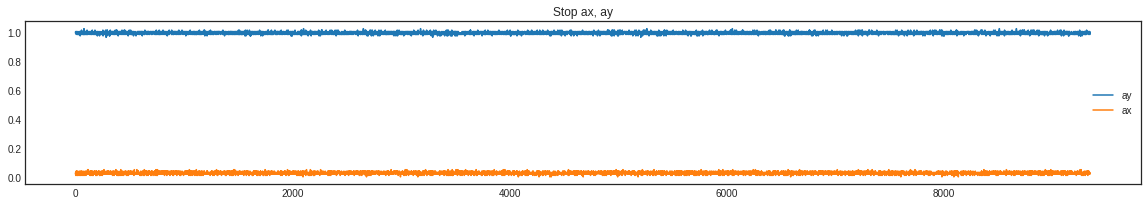

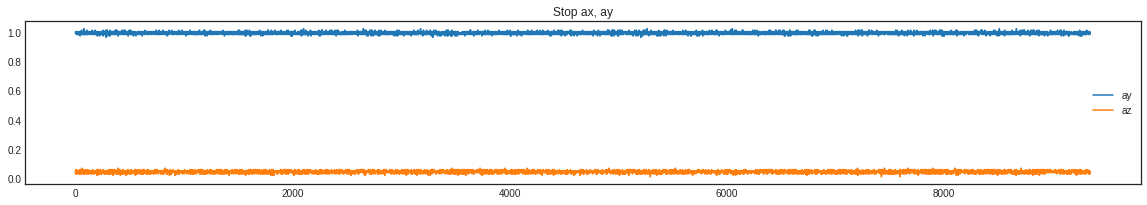

In [138]:
url_stop = "https://raw.githubusercontent.com/masa8/fan/master/stop.csv"
df_stop = pd.read_csv(url_stop,header=None, names=['ax', 'ay', 'az'])
df_stop.plot(y=["ay","ax"],title="Stop ax, ay")
df_stop.plot(y=["ay","az"],title="Stop ax, ay")

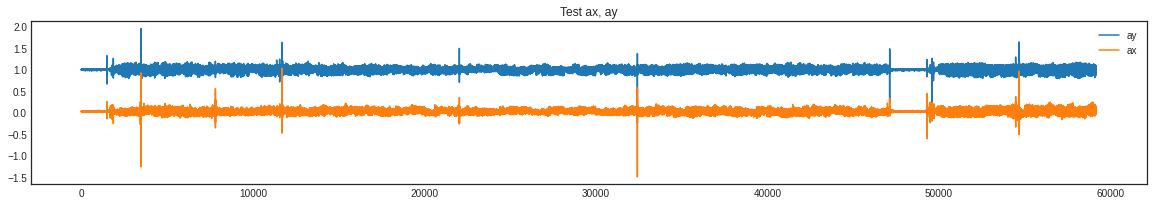

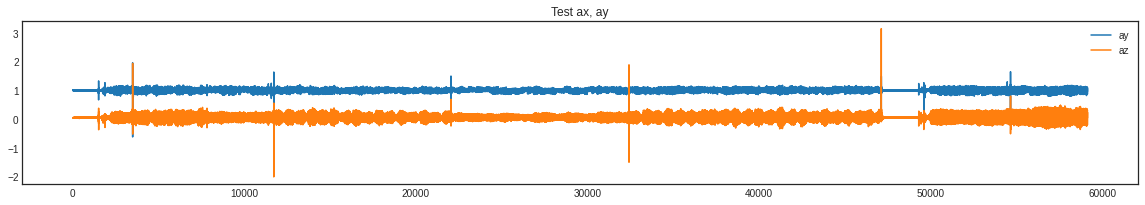

In [212]:
url_test = "https://raw.githubusercontent.com/masa8/fan/master/test.csv"
df_test = pd.read_csv(url_test,header=None, names=['ax', 'ay', 'az'])
df_test.plot(y=["ay","ax"],title="Test ax, ay")
df_test.plot(y=["ay","az"],title="Test ax, ay")

### Analysis

##### FFT

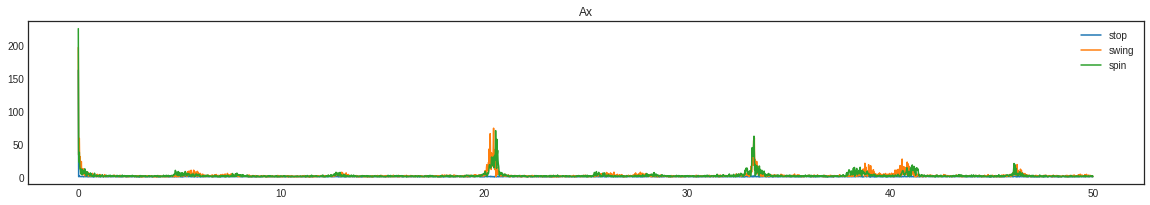

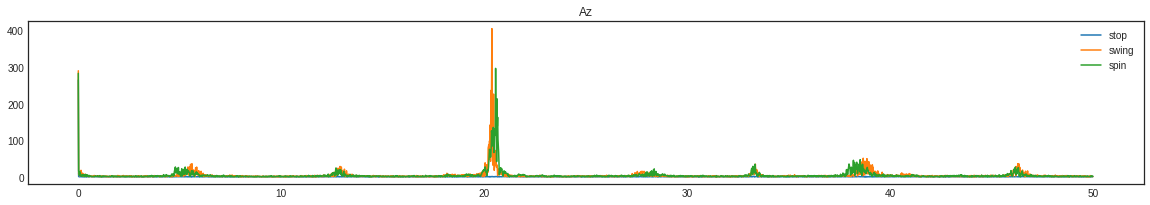

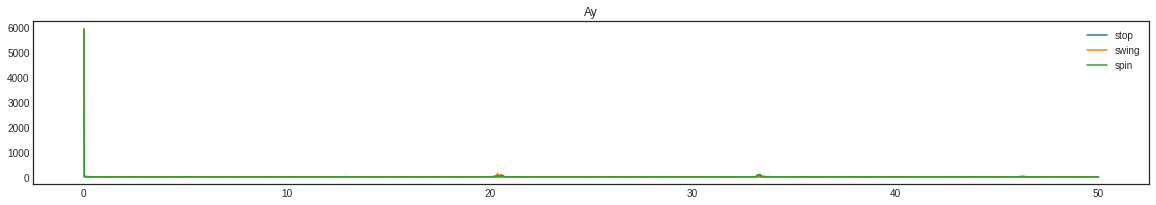

In [198]:



from scipy.fft import rfft, rfftfreq

# Number of samples in normalized_tone
SAMPLE_RATE = 100
DURATION = 60
N = SAMPLE_RATE * DURATION
stopfft = df_stop[:N]
swingfft = df_swing[:N]
spinfft = df_spin[:N]

yf_ax_stop = rfft(stopfft["ax"].values)
xf_ax_stop = rfftfreq(N, 1 / SAMPLE_RATE)
yf_ax_swing = rfft(swingfft["ax"].values)
xf_ax_swing = rfftfreq(N, 1 / SAMPLE_RATE)
yf_ax_spin = rfft(spinfft["ax"].values)
xf_ax_spin = rfftfreq(N, 1 / SAMPLE_RATE)

plt.title("Ax")
plt.plot(xf_ax_stop, np.abs(yf_ax_stop), label = "stop")
plt.plot(xf_ax_swing, np.abs(yf_ax_swing), label = "swing")
plt.plot(xf_ax_spin, np.abs(yf_ax_spin), label = "spin")
plt.legend()
plt.show()

yf_az_stop = rfft(stopfft["az"].values)
xf_az_stop = rfftfreq(N, 1 / SAMPLE_RATE)
yf_az_swing = rfft(swingfft["az"].values)
xf_az_swing = rfftfreq(N, 1 / SAMPLE_RATE)
yf_az_spin = rfft(spinfft["az"].values)
xf_az_spin = rfftfreq(N, 1 / SAMPLE_RATE)



plt.title("Az")
plt.plot(xf_az_stop, np.abs(yf_az_stop), label = "stop")
plt.plot(xf_az_swing, np.abs(yf_az_swing), label = "swing")
plt.plot(xf_az_spin, np.abs(yf_az_spin), label = "spin")
plt.legend()
plt.show()


yf_ay_stop = rfft(stopfft["ay"].values)
xf_ay_stop = rfftfreq(N, 1 / SAMPLE_RATE)
yf_ay_swing = rfft(swingfft["ay"].values)
xf_ay_swing = rfftfreq(N, 1 / SAMPLE_RATE)
yf_ay_spin = rfft(spinfft["ay"].values)
xf_ay_spin = rfftfreq(N, 1 / SAMPLE_RATE)

plt.title("Ay")
plt.plot(xf_ay_stop, np.abs(yf_ay_stop), label = "stop")
plt.plot(xf_ay_swing, np.abs(yf_ay_swing), label = "swing")
plt.plot(xf_ay_spin, np.abs(yf_ay_spin), label = "spin")
plt.legend()
plt.show()





### Std

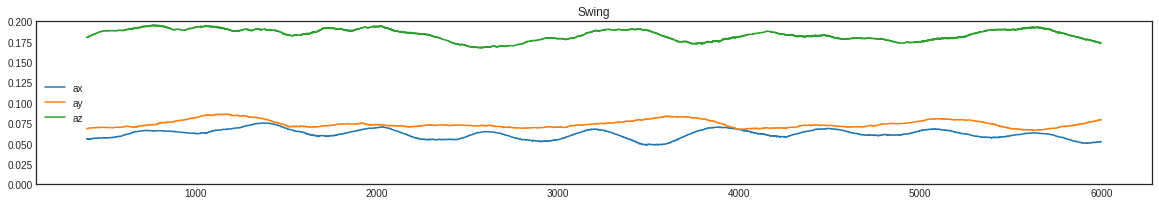

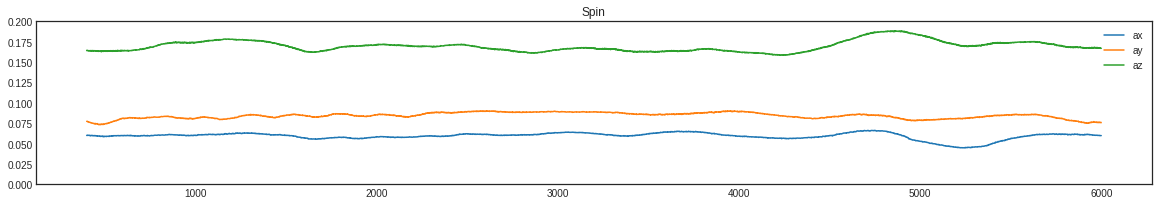

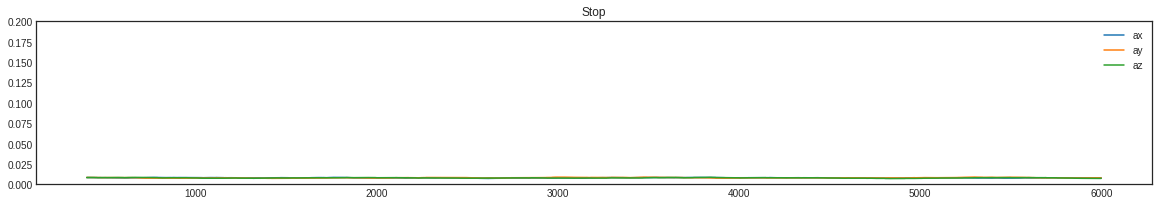

In [239]:
swingfft.rolling(window=400).std().plot(title="Swing",ylim=(0,0.2))
spinfft.rolling(window=400).std().plot(title="Spin",ylim=(0,0.2))
stopfft.rolling(window=400).std().plot(title="Stop",ylim=(0,0.2))

### Kurt.

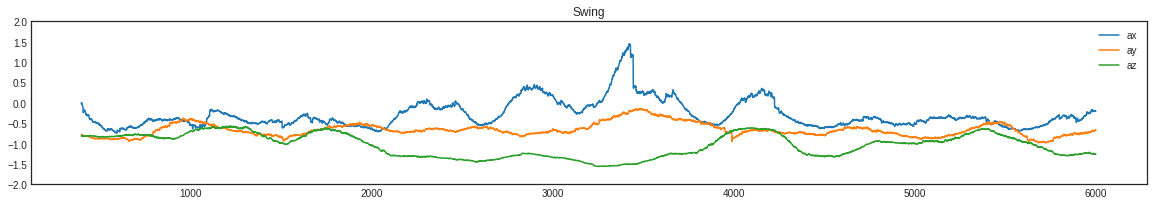

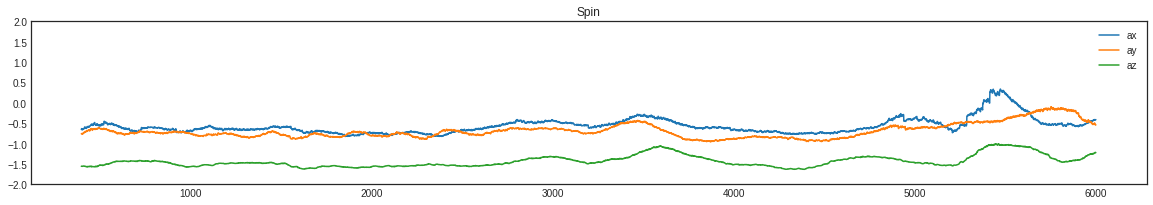

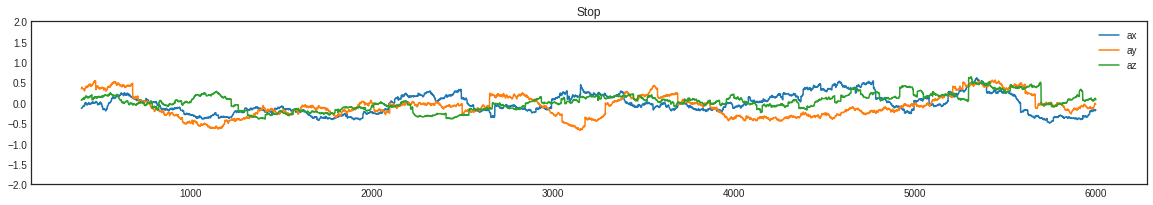

In [254]:
swingfft.rolling(window=400).kurt().plot(title="Swing",ylim=(-2,2))
spinfft.rolling(window=400).kurt().plot(title="Spin",ylim=(-2,2))
stopfft.rolling(window=400).kurt().plot(title="Stop",ylim=(-2,2))

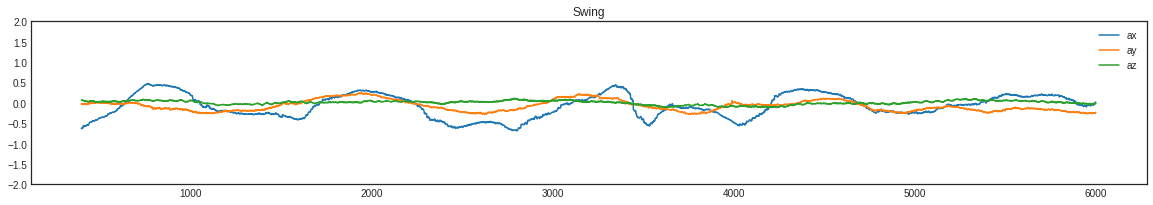

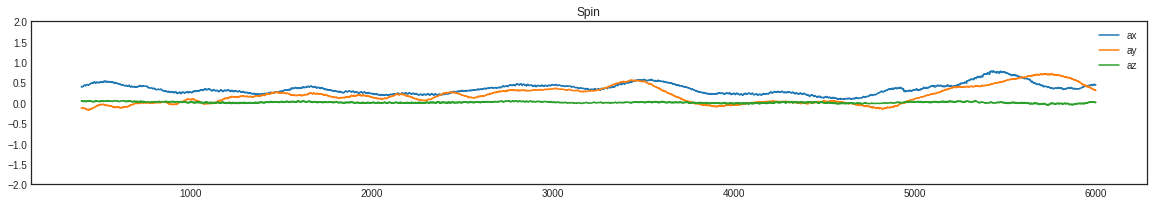

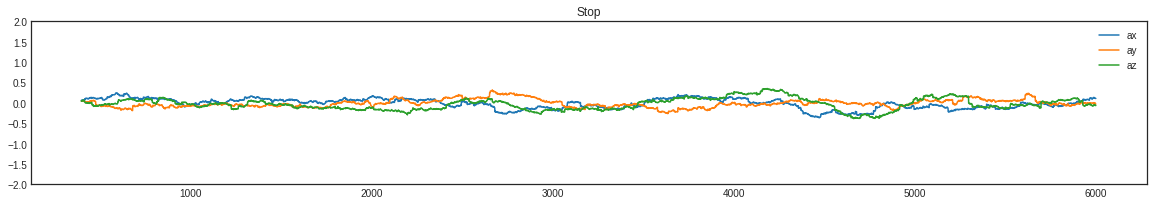

In [255]:
swingfft.rolling(window=400).skew().plot(title="Swing",ylim=(-2,2))
spinfft.rolling(window=400).skew().plot(title="Spin",ylim=(-2,2))
stopfft.rolling(window=400).skew().plot(title="Stop",ylim=(-2,2))